In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
claimants=files.upload()

Saving Book1.xlsx to Book1.xlsx


In [ ]:
df = pd.read_excel("Book1.xlsx")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


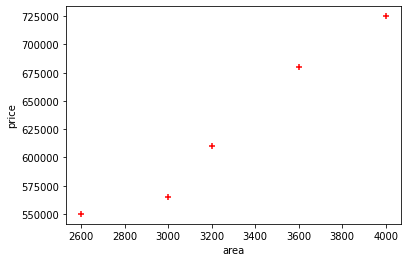

In [ ]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

In [ ]:
new_df = df.drop('price',axis='columns')
new_df 

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [ ]:
model = linear_model.LinearRegression()
model.fit(new_df,df.price)

LinearRegression()

In [ ]:
model.predict([[5000]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([859554.79452055])

price=m*area+b
y = mx+b, where m=slope, b = intercept


In [ ]:
model.coef_

array([135.78767123])

In [ ]:
model.intercept_

180616.43835616432

In [ ]:
# y=m*x + b
135.78767123*5000+180616.43835616432

859554.7945061643

how to predict price in a new data set?

In [ ]:
from google.colab import files
claimants=files.upload()

Saving Book2pred.xlsx to Book2pred.xlsx


In [ ]:
area_df = pd.read_excel('Book2pred.xlsx')
area_df

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [ ]:
model.predict(area_df)


array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [ ]:
p = model.predict(area_df)


In [ ]:
area_df['price'] = p
area_df

,area,price
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [ ]:
area_df.to_csv('prediction.csv',index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
filename = 'prediction.csv'
area_df.to_csv('/content/drive/MyDrive')

IsADirectoryError: ignored

In [ ]:
files.download('prediction.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Linear Regression Multiple Variables

Given these home prices find out price of a home that has,
###  # 3000 sqr ft area, 3 bedrooms, 40 year old
### #  2500 sqr ft area, 4 bedrooms, 5 year old

In [ ]:
from google.colab import files
a=files.upload()

Saving Book3.xlsx to Book3 (1).xlsx


In [ ]:
df = pd.read_excel('Book3 (1).xlsx')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
import math
df.bedrooms.median()

4.0

In [ ]:
df.bedrooms.fillna(df.bedrooms.median())

0    3.0
1    4.0
2    4.0
3    3.0
4    5.0
5    6.0
Name: bedrooms, dtype: float64

In [ ]:
df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
#Dividing our data into predictors and outcome variables
#x=claimants.iloc[:,1:]#Independent variables
#y=claimants.iloc[:,0]#Dependent variables

model = linear_model.LinearRegression()
model.fit(df.drop('price',axis='columns'),df.price)

LinearRegression()

In [ ]:
#Given these home prices find out price of a home that has,
#3000 sqr ft area, 3 bedrooms, 40 year old


#price = m₁ * area + m₂ * bedrooms + m3 * age + b

model.predict([[3000,3,40]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([498408.25158031])

In [ ]:
model.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [ ]:
model.intercept_

221323.00186540396

In [ ]:
#price = m₁ * area + m₂ * bedrooms + m3 * age + b
112.06244194*3000+23388.88007794*3 -3231.71790863*40+221323.00186540396 

498408.251574024

In [ ]:
#Given these home prices find out price of a home that has,
#2500 sqr ft area, 4 bedrooms, 5 year old 

model.predict([[2500,4,5 ]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([578876.03748933])

In [ ]:
# SVMB,SGR
from sklearn import svm
regr = svm.SVR()
regr.fit(df.drop('price',axis='columns'),df.price)

SVR()

In [ ]:
regr.predict([[3000,3,40]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  "X does not have valid feature names, but"


array([602499.80799365])